In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
folder = Path('../../../data/this_project/1_e_coli_batch_cultures/')
od_fn = folder / '1H_OD_and_gDW.csv'

In [3]:
biomass_df = pd.read_csv(od_fn, index_col=0)

# Calculate growth rates

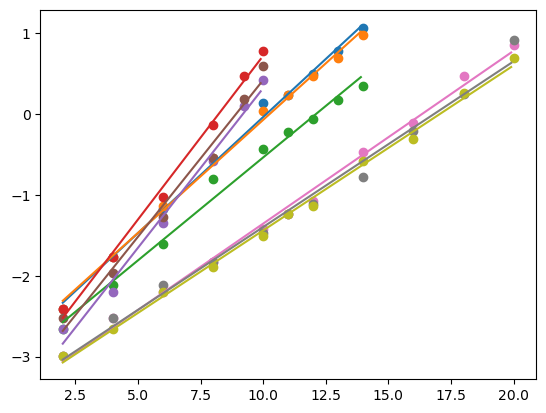

In [4]:
fit_period = {
    'Galactose': [2, 14],
    'L-malate': [2, 10],
    'L-alanine': [2, 20]
}
growth_rate_data = []

for b in biomass_df.Bioreactor.unique():
    idx = biomass_df.Bioreactor==b
    nanidx = biomass_df.isna().any(axis=1)
    df_b = biomass_df.loc[idx&~nanidx]
    cs = df_b['Carbon source'].values[0]
    tidx = (df_b['Hours']>= fit_period[cs][0]) & (df_b['Hours'] <= fit_period[cs][1])
    log_od = np.log(df_b.loc[tidx, 'OD'])
    fit = np.polyfit(df_b.loc[tidx, 'Hours'].values, log_od, 1)
    t = np.arange(fit_period[cs][0], fit_period[cs][1], 0.1)
    y = np.poly1d(fit)(t)
    growth_rate_data.append([b, cs, fit[0]])
    plt.plot(t, y)
    plt.scatter(df_b.loc[tidx, 'Hours'].values, log_od)
    # sns.scatterplot(data = df_b.loc[tidx], x = 'Hours', y = 'OD600')

In [5]:
growth_rate_df = pd.DataFrame(growth_rate_data, columns = ['Bioreactor', 'Carbon source', 'Growth rate'])
growth_rate_df.to_csv(folder/ '1I_growth_rates.csv')

In [6]:
growth_rate_df[['Carbon source', 'Growth rate']].groupby('Carbon source').agg(['mean', 'std'])

Growth rate          
                     mean       std
Carbon source                      
Galactose        0.273864  0.016978
L-alanine        0.207638  0.005340
L-malate         0.396022  0.008710

# gDW to OD

In [7]:
gDW_df = pd.read_csv(folder / '1G_measured_gDW.csv' , index_col=0)

In [8]:
gdw_per_OD = {}

# Galactose
idx = (gDW_df['Carbon source']=='Galactose')&(gDW_df['Hours']==13)
gdw_per_OD['Galactose'] = gDW_df.loc[idx, 'gDW/OD'].agg(['mean', 'std']).values

# L-malate
idx = (gDW_df['Carbon source']=='L-malate')&(gDW_df['Hours']==14)
gdw_per_OD['L-malate'] = gDW_df.loc[idx, 'gDW/OD'].agg(['mean', 'std']).values

# L-alanine
idx = (gDW_df['Carbon source']=='L-alanine')&(gDW_df['Hours']==22)
gdw_per_OD['L-alanine'] = gDW_df.loc[idx, 'gDW/OD'].agg(['mean', 'std']).values

In [9]:
gdw_per_OD

{'Galactose': array([0.34636469, 0.01556273]),
 'L-malate': array([0.27949681, 0.01672301]),
 'L-alanine': array([0.29630841, 0.01106821])}